# 城市气候与海洋的关系研究

导入包

In [107]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']

城市信息：citis = np.array(['asti','bologna','cesena','faenza','ferrara','mantova','milano','piacenza','ravenna','torino'])

In [108]:
citis = np.array(['asti','bologna','cesena','faenza','ferrara','mantova','milano','piacenza','ravenna','torino'])

导入数据各个海滨城市数据

In [109]:
cities = {}
for city in citis:
    data_15 = pd.read_csv('./%s_150715.csv' % (city))
    data_25 = pd.read_csv('./%s_250715.csv' % (city))
    data_27 = pd.read_csv('./%s_270615.csv' % (city))
    
    data = pd.concat((data_15,data_25,data_27),axis=0,ignore_index=True)
    data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
    cities[city] = data

查看行数

In [110]:
cities['asti'].shape

(68, 10)

In [111]:
cities['asti'].head()

temp  humidity  pressure   description          dt  wind_speed  wind_deg  \
0  28.05        66      1014  Sky is Clear  1436863176        2.57    42.501   
1  29.51        64      1014  Sky is Clear  1436866759        1.54   263.000   
2  30.39        58      1017  Sky is Clear  1436870510        2.60   100.000   
3  31.10        54      1017  Sky is Clear  1436874098        2.10    90.000   
4  33.23        45      1016    few clouds  1436877645        2.10   120.000   

   city                  day  dist  
0  Asti  2015-07-14 10:39:36   315  
1  Asti  2015-07-14 11:39:19   315  
2  Asti  2015-07-14 12:41:50   315  
3  Asti  2015-07-14 13:41:38   315  
4  Asti  2015-07-14 14:40:45   315

In [112]:
cities['asti'].dtypes

temp           float64
humidity         int64
pressure         int64
description     object
dt               int64
wind_speed     float64
wind_deg       float64
city            object
day             object
dist             int64
dtype: object

各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [113]:
dist = []
max_temp = []
min_temp = []
max_humidity = []
min_humidity = []
mean_humidity = []

for city,info in cities.items():
    print('%s:与海洋距离%d,最高温度%f,最低温度%f,最高湿度%d,最低湿度%d' % 
         (city, info['dist'].unique(), info['temp'].max(), info['temp'].min(), 
          info['humidity'].max(), info['humidity'].min()))
    
    dist.append(info['dist'].unique())
    max_temp.append(info['temp'].max())  
    min_temp.append(info['temp'].min()) 
    max_humidity.append(info['humidity'].max())  
    min_humidity.append(info['humidity'].min())  
    mean_humidity.append(info['humidity'].mean())
    

asti:与海洋距离315,最高温度34.310000,最低温度18.010000,最高湿度93,最低湿度29
bologna:与海洋距离71,最高温度33.850000,最低温度18.440000,最高湿度92,最低湿度40
cesena:与海洋距离14,最高温度32.810000,最低温度18.410000,最高湿度100,最低湿度61
faenza:与海洋距离37,最高温度32.740000,最低温度18.620000,最高湿度100,最低湿度61
ferrara:与海洋距离47,最高温度33.430000,最低温度18.810000,最高湿度85,最低湿度39
mantova:与海洋距离121,最高温度34.180000,最低温度19.030000,最高湿度100,最低湿度28
milano:与海洋距离250,最高温度34.810000,最低温度18.280000,最高湿度100,最低湿度35
piacenza:与海洋距离200,最高温度33.920000,最低温度18.680000,最高湿度100,最低湿度35
ravenna:与海洋距离8,最高温度32.790000,最低温度18.220000,最高湿度94,最低湿度34
torino:与海洋距离357,最高温度34.690000,最低温度18.940000,最高湿度88,最低湿度45


In [114]:
# 所有列表转换为ndarray
dist = np.array(dist)
max_temp = np.array(max_temp)
min_temp = np.array(min_temp)
max_humidity = np.array(max_humidity)
min_humidity = np.array(min_humidity)
mean_humidity = np.array(mean_humidity)

显示最高温度与离海远近的关系

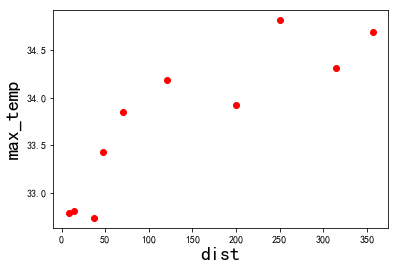

In [115]:
plt.plot(dist,max_temp,'ro')
plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('max_temp',fontdict=dict(fontsize=20))

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [116]:
# 使用级联将max_temp、dist拼接，生成坐标点
temp_dist = np.concatenate((dist.reshape(-1,1),max_temp.reshape(-1,1)),axis=1)
# 区分远海点和近海点
near_sea = temp_dist[temp_dist[:,0] < 100]
far_sea = temp_dist[temp_dist[:,0] > 50]
display(near_sea,far_sea)

array([[71.  , 33.85],
       [14.  , 32.81],
       [37.  , 32.74],
       [47.  , 33.43],
       [ 8.  , 32.79]])

array([[315.  ,  34.31],
       [ 71.  ,  33.85],
       [121.  ,  34.18],
       [250.  ,  34.81],
       [200.  ,  33.92],
       [357.  ,  34.69]])

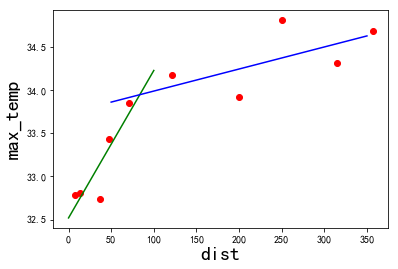

In [117]:
# 用线性回归预测并画出远近海两条直线
from sklearn.linear_model import LinearRegression

near_reg = LinearRegression()
near_reg.fit(near_sea[:,0].reshape(-1,1),near_sea[:,1])
w1 = near_reg.coef_
b1 = near_reg.intercept_
x1_text = np.linspace(0,100,100)

far_reg = LinearRegression()
far_reg.fit(far_sea[:,0].reshape(-1,1),far_sea[:,1])
w2 = far_reg.coef_
b2 = far_reg.intercept_
x2_text = np.linspace(50,350,100)

# y = w*x+b
plt.plot(dist,max_temp,'ro')
plt.plot(x1_text.reshape(-1,1),x1_text*w1+b1,'g')
_ = plt.plot(x2_text.reshape(-1,1),x2_text*w2+b2,'b')

plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('max_temp',fontdict=dict(fontsize=20))

使用支持向量机计算回归参数

In [118]:
temp_dist

array([[315.  ,  34.31],
       [ 71.  ,  33.85],
       [ 14.  ,  32.81],
       [ 37.  ,  32.74],
       [ 47.  ,  33.43],
       [121.  ,  34.18],
       [250.  ,  34.81],
       [200.  ,  33.92],
       [  8.  ,  32.79],
       [357.  ,  34.69]])

In [119]:
y = np.where(temp_dist[:,0]<100,0,1)
y

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

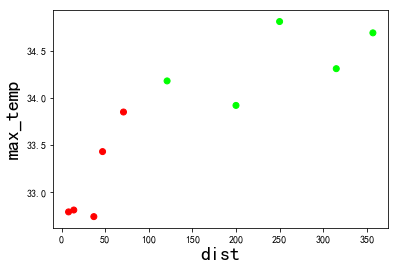

In [120]:
from matplotlib.colors import ListedColormap
lcmap = ListedColormap([(1,0,0),(0,1,0)])
plt.scatter(temp_dist[:,0],temp_dist[:,1],c=y,cmap = lcmap)

plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('max_temp',fontdict=dict(fontsize=20))

In [121]:
from sklearn.svm import SVC
x = temp_dist
svc = SVC(kernel = 'linear')
svc.fit(x,y)
w_ = svc.coef_
b_ = svc.intercept_
# 参数
display(svc.coef_,svc.intercept_)
# 支持向量
support_vectors_ = svc.support_vectors_
support_vectors_

array([[0.03999827, 0.00026399]])

array([-3.84881313])

array([[ 71.  ,  33.85],
       [121.  ,  34.18]])

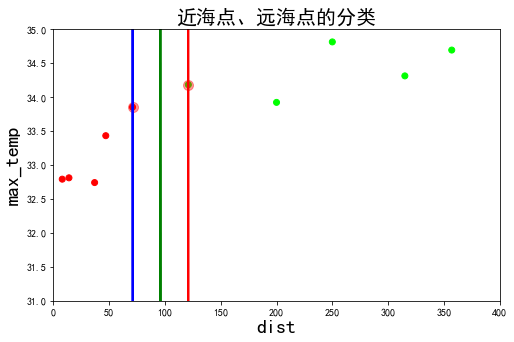

In [122]:
# f(x,y) = w_[0,0]*x + w_[0,1]*y + b_[0] = 0
# y = -w_[0,0]/w_[0,1]*x - b_[0]/w_[0,1]
plt.figure(figsize=(8,5))
plt.scatter(temp_dist[:,0],temp_dist[:,1],c=y,cmap = lcmap)
w = -w_[0,0]/w_[0,1]
b = - b_[0]/w_[0,1]
plt.plot(x[:,0],x[:,0]*w+b,color = 'green')
plt.scatter(support_vectors_[:,0],support_vectors_[:,1],s = 100,color = 'red',alpha = 0.4)
b1 = support_vectors_[0,1] - w*support_vectors_[0,0]
b2 = support_vectors_[-1,1] - w*support_vectors_[-1,0]
plt.plot(x[:,0],w*x[:,0] + b1,color = 'blue')
plt.axis([0,400,31,35])
plt.plot(x[:,0],w*x[:,0] + b2,color = 'red')

plt.title('近海点、远海点的分类',fontdict=dict(fontsize=20))
plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('max_temp',fontdict=dict(fontsize=20))

查看最低温度与海洋距离的关系

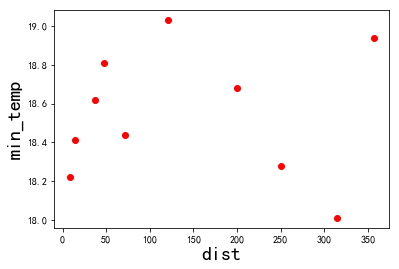

In [123]:
plt.plot(dist,min_temp,'ro')
plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('min_temp',fontdict=dict(fontsize=20))

最低湿度与海洋距离的关系

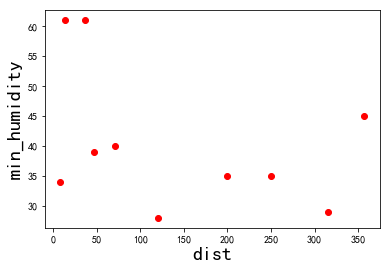

In [124]:
plt.plot(dist,min_humidity,'ro')
plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('min_humidity',fontdict=dict(fontsize=20))

最高湿度与海洋距离的关系

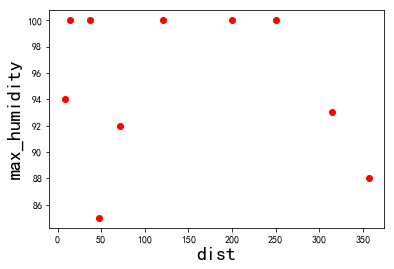

In [125]:
plt.plot(dist,max_humidity,'ro')
plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('max_humidity',fontdict=dict(fontsize=20))

平均湿度与海洋距离的关系

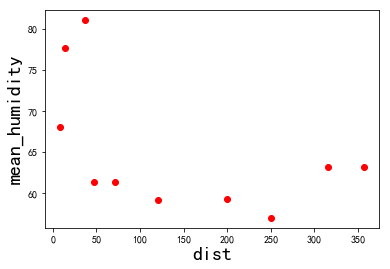

In [126]:
plt.plot(dist,mean_humidity,'ro')
plt.xlabel('dist',fontdict=dict(fontsize=20))
_ = plt.ylabel('mean_humidity',fontdict=dict(fontsize=20))

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

In [127]:
mean_humidity

array([63.13235294, 61.33823529, 77.64705882, 81.07462687, 61.30882353,
       59.14705882, 56.98484848, 59.30882353, 68.01515152, 63.19117647])

In [128]:
# from sklearn.svm import SVR

# svm_poly_reg = SVR()
# svm_poly_reg.fit(dist,mean_humidity)
# svm_poly_reg.support_vectors_
# y_ = svm_poly_reg.predict(dist)
# plt.plot(dist,mean_humidity,'ro')
# plt.plot(dist,y_)
# plt.axis([0,370,50,85])

风向与风速的关系

In [129]:
cities['milano'].shape

(66, 10)

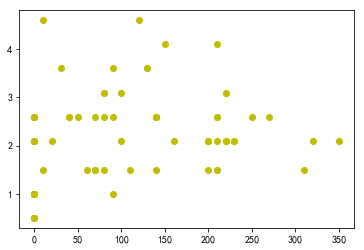

In [130]:
wind_speed = cities['milano']['wind_speed'].values
wind_deg = cities['milano']['wind_deg'].values
plt.plot(wind_deg, wind_speed, 'yo')

在子图中，同时比较风向与湿度和风力的关系

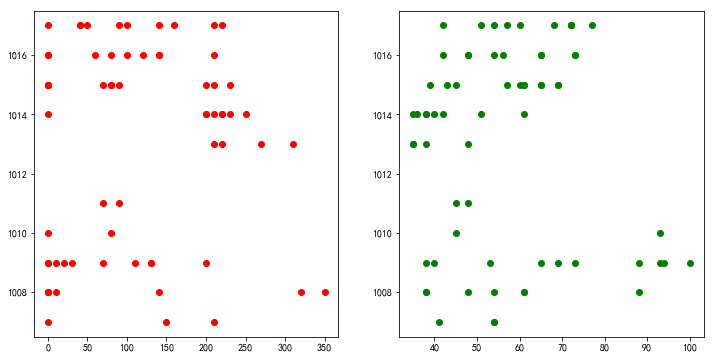

In [131]:
humidity = cities['milano']['humidity'].values
pressure = cities['milano']['pressure'].values
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(wind_deg, pressure, 'ro')
plt.subplot(122)
plt.plot(humidity, pressure, 'go')

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [132]:
cities['milano'].head()

temp  humidity  pressure   description          dt  wind_speed  wind_deg  \
0  28.57        54      1016  Sky is Clear  1436863175         2.1       100   
1  29.74        48      1016  Sky is Clear  1436866758         2.6         0   
2  31.12        48      1016  Sky is Clear  1436870509         2.6       140   
3  32.16        45      1015  Sky is Clear  1436874098         2.1         0   
4  33.59        43      1015  Sky is Clear  1436877644         3.1        80   

     city                  day  dist  
0  Milano  2015-07-14 10:39:35   250  
1  Milano  2015-07-14 11:39:18   250  
2  Milano  2015-07-14 12:41:49   250  
3  Milano  2015-07-14 13:41:38   250  
4  Milano  2015-07-14 14:40:44   250

In [133]:
wind_counts,wind_range = np.histogram(wind_deg,bins = 8,range=[0,360])
wind_counts,wind_range

(array([21,  9,  9,  6, 14,  3,  2,  2], dtype=int64),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.]))

<BarContainer object of 8 artists>

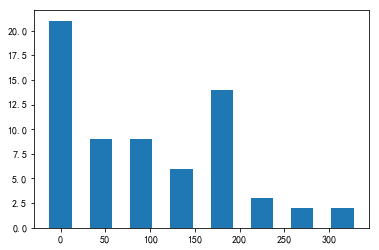

In [134]:
# wind_range9个
plt.bar(wind_range[:-1],wind_counts,width = 25)

计算米兰各个方向上的风速

<BarContainer object of 8 artists>

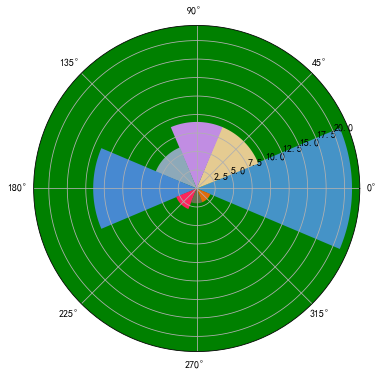

In [135]:
plt.figure(figsize=(6,6))
plt.axes(polar = True,facecolor = 'g')
plt.bar(np.arange(0,2*np.pi,np.pi/4),wind_counts,color = np.random.rand(8,3))

将各个方向的风速保存在列表中

In [136]:
cities['milano'].head()

temp  humidity  pressure   description          dt  wind_speed  wind_deg  \
0  28.57        54      1016  Sky is Clear  1436863175         2.1       100   
1  29.74        48      1016  Sky is Clear  1436866758         2.6         0   
2  31.12        48      1016  Sky is Clear  1436870509         2.6       140   
3  32.16        45      1015  Sky is Clear  1436874098         2.1         0   
4  33.59        43      1015  Sky is Clear  1436877644         3.1        80   

     city                  day  dist  
0  Milano  2015-07-14 10:39:35   250  
1  Milano  2015-07-14 11:39:18   250  
2  Milano  2015-07-14 12:41:49   250  
3  Milano  2015-07-14 13:41:38   250  
4  Milano  2015-07-14 14:40:44   250

In [137]:
cities['milano']['wind_speed'].unique()

array([2.1, 2.6, 3.1, 4.1, 0.5, 1. , 1.5, 3.6, 4.6])

画出各个方向的风速

In [138]:
cities['milano']['wind_speed']

0     2.1
1     2.6
2     2.6
3     2.1
4     3.1
5     2.1
6     2.1
7     3.1
8     2.6
9     4.1
10    2.1
11    2.1
12    2.1
13    0.5
14    1.0
15    1.5
16    1.5
17    2.6
18    1.0
19    1.0
20    1.5
21    1.0
22    1.5
23    3.1
24    3.6
25    2.6
26    3.1
27    3.6
28    3.6
29    2.6
     ... 
36    2.6
37    3.6
38    2.1
39    4.6
40    2.6
41    1.5
42    1.5
43    1.0
44    1.5
45    0.5
46    1.0
47    1.5
48    2.6
49    2.1
50    1.5
51    2.1
52    2.6
53    2.1
54    2.6
55    3.1
56    2.6
57    1.5
58    2.1
59    2.1
60    4.6
61    2.6
62    2.6
63    2.6
64    2.6
65    0.5
Name: wind_speed, Length: 66, dtype: float64

将上面步骤写成函数

[1.8142857142857147, 2.2222222222222223, 2.855555555555556, 2.583333333333333, 2.328571428571429, 2.266666666666667, 2.05, 2.1]


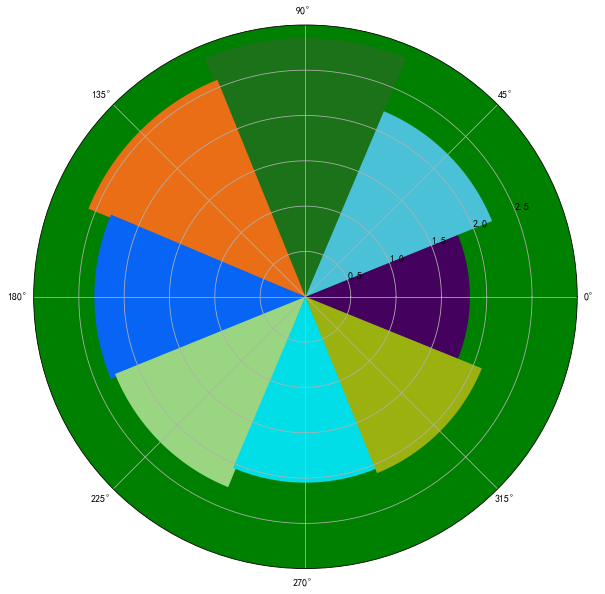

In [139]:
def polar(city):
    def convert():
        wind_speed = []
        for i in range(45,361,45):
            cond = (cities[city]['wind_deg'] >= (i-45)) & (cities[city]['wind_deg'] < i)
            wind_speed.append(cities[city][cond]['wind_speed'].mean())
        return wind_speed
        
    wind_speed = convert()
    
    plt.figure(figsize=(10,10))
    plt.axes(polar = True,facecolor = 'g')
    plt.bar(np.arange(0,2*np.pi,np.pi/4),wind_speed,color = np.random.rand(8,3))
    
polar('milano')